# LGE - SNU AI Scientist 고급과정 [확률통계 및 통계 방법론]
## 6장: 데이터 기반 의사결정
### TA: 홍현경(hyungyeong81@snu.ac.kr)

# 1. 모평균에 대한 유의성 검정 (모분산을 모르는 정규모집단)

- t-검정 (one sample t-test)
- 귀무가설: $H_0:\ \mu = \mu_0$
- 검정통계량:
$$
T = \frac{\bar X - \mu_0}{S / \sqrt{n}}
$$
- 귀무가설 하에서
$$
T \sim t(n-1).
$$
- 검정통계량의 관측값: $t_0$

- $t \sim t(k)$일 때, 분위수 $t_p(k)$는
$
P(T \le t_p(k)) = p
$
를 만족하는 값이다.

- 이를 이용하여 대립가설에 따른 유의확률과 기각역을 다음과 같이 나타낼 수 있다.


\begin{array}{c|c|c}
\hline
\text{대립가설 } H_1 & \text{유의확률 (p-value)} & \text{유의수준 } \alpha \text{의 기각역} \\
\hline
\mu > \mu_0 & P(T > t_0) & T > t_{1-\alpha}(n-1) \\
\mu < \mu_0 & P(T < t_0) & T < -t_{1-\alpha}(n-1) \\
\mu \neq \mu_0 & P(|T| > |t_0|) & |T| > t_{1-\alpha/2}(n-1) \\
\hline
\end{array}

(모평균에 대한 유의성 검정 예제)
- 한 F1 팀이 새 피트 전략 $A$를 도입할지 판단하기 위해, 기존 전략 $B$ 대비 랩타임(초) 개선량을 시뮬레이션으로 평가한다고 하자. 독립적인 시뮬레이션을 $n = 100$번 수행하여, 각 반복에서 얻는 개선량을 $X_1,\dots,X_n$이라 하자. $X_i$는 서로 독립이고 정규분포를 따른다고 가정하며, 랩타임 개선량의 모분산은 알려져 있지 않다고 하자. 시뮬레이션 결과, 표본평균과 표본표준편차는 각각 $\bar x = 0.06, \ S = 0.3$로 관측되었다.

- 새 피트 전략이 통계적으로 유의하다고 판단되기 위해서는 평균 랩타임 개선량이 양수여야 한다. 따라서 다음 가설을 검정한다.

$$
H_0:\mu=0\qquad \text{vs} \qquad H_1:\mu>0
$$

- 유의수준 5\%에서 주어진 가설을 검정하여라.
- 참고: 본 문제에서 주어진 값 $\bar x = 0.06,\; S = 0.3$은 시뮬레이션을 통해 관측된 표본 요약통계량이다. 파이썬 실습에서는 먼저 정규분포로부터 임의의 표본을 생성한 뒤, 선형변환을 적용하여 생성된 데이터의 표본평균과 표본표준편차가 위 값과 정확히 일치하도록 맞춘다.

In [ ]:
import numpy as np
from scipy import stats

# 데이터 시뮬레이션
np.random.seed(2026)

n = 100

# 원하는 표본 통계량
target_xbar = 0.06
target_s = 0.3

# 표본평균, 표본표준편차를 강제로 맞추어 표본 생성
z = np.random.normal(size=n)

# 표준화 (표본평균 0, 표본표준편차 1)
z = (z - z.mean()) / z.std(ddof=1)

# 원하는 평균과 표준편차로 변환
x = target_xbar + target_s * z

# 확인
xbar = np.mean(x)
s = np.std(x, ddof=1)

print(f"xbar = {xbar:.3f}")
print(f"s    = {s:.3f}")

xbar = 0.060
s    = 0.300


In [ ]:
mu0 = 0.0
alpha = 0.05
df = n - 1

# 검정통계량 계산

# ------------------
# 코드 채우기
# ------------------

print(f"t statistic = {t_stat:.3f}")

t statistic = 2.000


In [ ]:
# 단측검정: H0: mu = 0 vs H1: mu > 0

# ------------------
# 코드 채우기
# ------------------


print("[One-sided test result(mu > 0)]")
print(f"critical value = {crit_one:.3f}")
print(f"Reject by critical-value? {t_stat >= crit_one}")
print(f"p-value = {pval_one:.3f}")
print(f"Reject by p-value? {pval_one <= alpha}")

[One-sided test result(mu > 0)]
critical value = 1.660
Reject by critical-value? True
p-value = 0.024
Reject by p-value? True


아래와 같이 대립가설을 다르게 설정하여 추가적인 검정도 가능하다.

In [ ]:
# 양측검정: H0: mu = 0 vs H1: mu != 0

# ------------------
# 코드 채우기
# ------------------


print("[Two-sided test result(mu != 0)]")
print(f"critical value = ±{crit_two:.3f}")
print(f"Reject by critical-value? {abs(t_stat) >= crit_two}")
print(f"p-value = {pval_two:.3f}")
print(f"Reject by p-value? {pval_two <= alpha}")

[Two-sided test result(mu != 0)]
critical value = ±1.984
Reject by critical-value? True
p-value = 0.048
Reject by p-value? True


In [ ]:
# 반대쪽 단측검정: H0: mu = 0 vs H1: mu < 0

# ------------------
# 코드 채우기
# ------------------

print("[One-sided test result(mu < 0)]")
print(f"critical value = {crit_left:.3f}")
print(f"Reject by critical-value? {t_stat <= crit_left}")
print(f"p-value = {pval_left:.3f}")
print(f"Reject by p-value? {pval_left <= alpha}")

[One-sided test result(mu < 0)]
critical value = -1.660
Reject by critical-value? False
p-value = 0.976
Reject by p-value? False


# 2. 두 그룹의 비교: A/B 검정

- 임의 순열 방법은 두 그룹 간 차이에 대한 유의성 검정에서 p-value를 구하기 위한 비모수적 방법이다.

- 이 방법은 다음과 같은 귀무가설에 근거한다.  
  - 귀무가설이 참이라면, 두 그룹 간에는 차이가 없으므로, 두 그룹의 데이터를 섞어도 구분할 수 없어야 한다.

- 일반적으로 두 그룹의 차이를 나타내는 검정통계량으로
  두 그룹 평균의 차이를 사용한다.
  $$
  T = \bar{X}_A - \bar{X}_B
  $$

- 임의 순열 방법의 절차는 다음과 같다.
  1. 두 그룹의 데이터를 모두 합친다.
  2. 데이터를 임의로 섞은 뒤, 원래의 그룹 크기를 유지한 채
     두 그룹으로 다시 나눈다.
  3. 재배치된 두 그룹에 대해 검정통계량 $T$를 계산한다.
  4. 이 과정을 여러 번 반복하여 $T$의 경험적 분포를 구한다.

- 이렇게 얻은 검정통계량의 경험적 분포는 귀무가설 하에서의 검정통계량 분포에 대한 근사로 해석할 수 있다.

- p-value는 이 경험적 분포에서 관측된 검정통계량보다 더 극단적인 값이 관측될 확률을 의미한다..

- 계산된 p-value를 주어진 유의수준과 비교하여, p-value가 유의수준보다 작으면 귀무가설을 기각한다.

- 임의 순열 방법은 데이터의 분포에 대한 가정을 필요로 하지 않으며, 정규성 가정이 적절하지 않은 경우에도 적용할 수 있다는 장점이 있다.

(A/B 검정 예제)

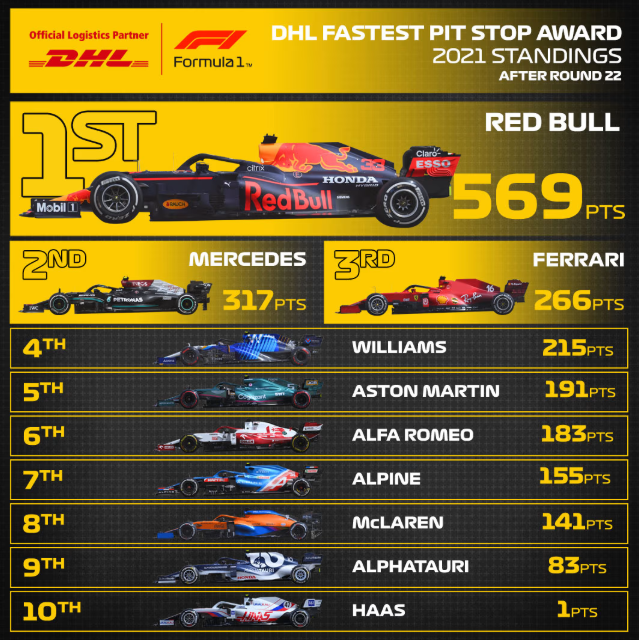

- 이 예제에서는 2021 시즌의 Formula 1 피트스탑 데이터에서 `team`이 **Red Bull** 또는 **McLaren**인 관측치만 추출하고, 피트스탑 소요시간 `duration`(초)을 비교한다.

- 먼저 두 팀의 `duration` 분포를 boxplot으로 시각화하여, 두 팀의 데이터의 특징을 확인한다.

- 그 다음, 검정통계량을
  $$T = \overline{\text{duration}}_{\text{Red Bull}} - \overline{\text{duration}}_{\text{McLaren}}$$
  로 두고, 팀 라벨을 무작위로 섞는 permutation을 $B=10000$번 반복하여 $T$의 경험적 분포를 만든다.

- 마지막으로 permutation 분포에서 관측된 $T_{\text{obs}}$보다 더 극단적인 값이 얼마나 자주 나오는지 계산해 p-value를 구하고, 이를 통해 두 팀의 평균 피트스탑 시간이 통계적으로 유의미하게 다른지를 판단한다.

- (참고) 본 예제에서는 순수한 피트스탑 수행 능력을 비교하기 위해,
장비 문제·페널티 등 비정상적 이벤트로 간주되는 8초 이상 소요된 피트스탑을 분석에서 제외하였다.

In [ ]:
# csv 파일을 불러오기 위해 드라이브 마운트 진행
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기
PATH = "/content/drive/MyDrive/f1-pit-stop-data(2021).csv"
df = pd.read_csv(PATH)

# 분석 대상 팀 설정
team_A = "Red Bull"
team_B = "McLaren"

# 두 팀 데이터만 필터링
df_sub = df[df["team"].isin([team_A, team_B])].copy()
df_sub = df_sub.dropna(subset=["duration"])

# 8초 이상의 피트스탑 제거
df_sub = df_sub[df_sub["duration"] < 8].copy()

A = df_sub.loc[df_sub["team"] == team_A, "duration"].to_numpy(dtype=float)
B = df_sub.loc[df_sub["team"] == team_B, "duration"].to_numpy(dtype=float)

print(f"[data size] {team_A}: {len(A)}, {team_B}: {len(B)}")
print(f"[mean] {team_A}: {A.mean():.4f}, {team_B}: {B.mean():.4f}")
print(f"[obs diff] mean({team_A}) - mean({team_B}) = {A.mean() - B.mean():.4f}")

[data size] Red Bull: 66, McLaren: 53
[mean] Red Bull: 2.5485, McLaren: 3.3172
[obs diff] mean(Red Bull) - mean(McLaren) = -0.7687


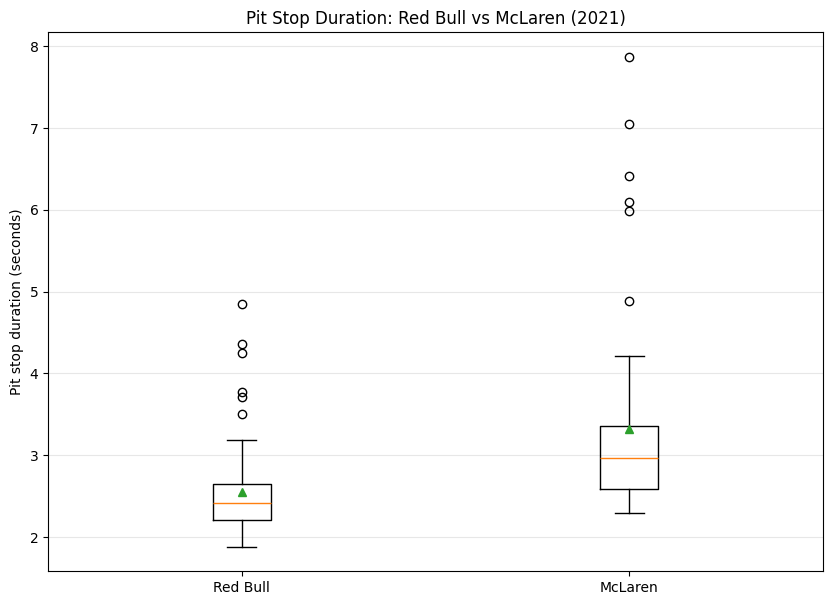

In [ ]:
# boxplot을 이용한 시각화
plt.figure(figsize=(10, 7))
plt.boxplot([A, B], tick_labels=[team_A, team_B], showmeans=True)
plt.ylabel("Pit stop duration (seconds)")
plt.title("Pit Stop Duration: Red Bull vs McLaren (2021)")
plt.grid(axis="y", alpha=0.3)
plt.show()

In [ ]:
# Permutation A/B test
# 귀무가설: 두 팀의 피트스탑 시간 평균이 동일하다.
# 대립가설: 두 팀의 피트스탑 시간 평균이 다르다.
# 검정통계량: T = mean(A) - mean(B)

np.random.seed(2026)

x = np.concatenate([A, B])
nA = len(A)

# 관측된 검정통계량

# ------------------
# 코드 채우기
# ------------------

B = 10000  # 순열 반복 횟수
T_perm = np.empty(B)

# ------------------
# 코드 채우기
# ------------------


# 양측검정 p-value

# ------------------
# 코드 채우기
# ------------------

print(f"T_obs = {T_obs:.6f}")
print(f"p-value (two-sided) = {p_twosided:.3f}")

T_obs = -0.768685
p-value (two-sided) = 0.000


- 위의 예제에서는 대립가설을 두 팀의 피트스탑 시간 평균이 다르다고 두어, 양측 검정을 시행했다.
- 양측검정의 경우, 두 팀의 평균 피트스탑 시간이 동일하다는 귀무가설을 기각할 수 있다.
- 즉, Red Bull과 McLaren의 평균 피트스탑 시간에는 통계적으로 유의미한 차이가 있는 것으로 나타났다.
- 다음과 같이 대립 가설을 설정하여 단측 검정도 가능하다.

In [ ]:
# 대립가설: Red Bull(A)의 피트스탑 시간 평균이 더 빠르다.

# ------------------
# 코드 채우기
# ------------------

print(f"T_obs = {T_obs:.6f}")
print(f"p-value (one-sided: Red Bull is faster) = {p_onesided:.3f}")

T_obs = -0.768685
p-value (one-sided: Red Bull is faster) = 0.000


- 단측검정 결과 역시 귀무가설이 기각되었다.
- 즉, Red Bull의 평균 피트스탑 시간이 McLaren보다 더 짧다는 방향의 차이가 통계적으로 유의미한 것으로 나타났다.
- 아래와 같이 대립가설을 설정하면 반대쪽의 단측 검정 역시 가능하다.
- 그러나, 이 경우에는 p-value가 유의수준보다 크기 때문에 귀무가설을 기각할 수 없다.

In [ ]:
# 대립가설: McLaren(B)의 피트스탑 시간 평균이 더 빠르다.

# ------------------
# 코드 채우기
# ------------------

print(f"T_obs = {T_obs:.6f}")
print(f"p-value (one-sided: McLaren is faster) = {p_onesided:.3f}")

T_obs = -0.768685
p-value (one-sided: McLaren is faster) = 1.000
